# Central Limit Theorem

The central limit theorem (CLT) states that the distribution of sample approximates a normal distribution (also known as a “bell curve”) as the sample size becomes larger, assuming that all samples are identical in size, and regardless of the population distribution shape.<br>

The more samples one takes, the more the graphed results take the shape of a normal distribution.<br>

<b>Use of CLT : </b><br>Central Limit Theorem exhibits a phenomenon where the average of the sample means and standard deviations equal the population mean and standard deviation, which is extremely useful in accurately predicting the characteristics of populations.<br>

<b>Assumptions of CLT : </b><br>
<li>Sampling procedure must be random</li>
<li>Samples are to be independent among each other</li>
<li>Sample size should not be more than 10% of the population when sampling is done without replacement</li>
<li>Sample should be sufficiently large</li>

    
<p>If these assumptions are considered true, the CLT allows you to make inferences about your initial population. Furthermore, the larger the size of your samples, the more evident will be the bell-shape of your sample mean distribution.</p>


<b>Example : </b><br>Say, for example, an investor wishes to analyze the overall return for a stock index that comprises 1,000 equities. In this scenario, that investor may simply study a random sample of stocks, to cultivate estimated returns of the total index. At least 30 randomly selected stocks, across various sectors, must be sampled, for the central limit theorem to hold. Furthermore, previously-selected stocks must be swapped out with different names, to help eliminate bias.



In order to appreciate thsi theorem, Let's visualize it<br>
<p>Let's create a random samples of  womens's weight (by assuming the range between 60 and 90 kg's), each of size n=50<br>
    Now we run this simulation multiple times and see whether the sample means distribution resembles a Normal distribution</p>

In [32]:
#Importing nessesary libraries
import numpy as np
import matplotlib.pyplot as plt

**Creating Data Set**

In [33]:
# seed the random number generator, so that the experiment is #replicable
seed(1)
# Generating the sample of women's weight
weights = np.random.randint(60, 90, 50)
print(weights)
print('The average weight is {} kg'.format(mean(weights)))

[65 71 72 68 69 71 65 75 60 76 61 72 67 73 88 66 85 78 80 65 78 80 71 88
 70 88 89 74 78 64 83 83 69 77 83 60 82 73 69 69 67 89 82 85 61 60 88 77
 68 84]
The average weight is 74.32 kg


**Let's Repeat the simulation for 1000 times**

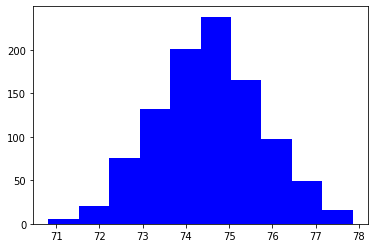

The mean of the sample means is 74.54001999999998


In [34]:
# seed the random number generator
seed(1)
# calculating the mean of 50 women's weights 1000 times
means = [mean(randint(60, 90, 50)) for _i in range(1000)]
# plotting the distribution of sample means
plt.hist(means,color='b')
plt.show()
print('The mean of the sample means is {}'.format(mean(means)))


According, to the Central Limit Theorem, the mean of sample means which is 78.54 should be a good estimate of the real parameter which is unknown 

In [49]:
#Importing nessesary libraries
from pylab import *
from scipy.stats import norm
import scipy.special as sps

## Drawing sample distribution

Plotting the distribution for one sample

In [50]:
def plot_samples_distribution(no_of_exp, samples, mu, distribution_name):
    pltdim = np.math.ceil(np.math.sqrt(no_of_exp))
    fig, axs = plt.subplots(pltdim, pltdim,
                           figsize=(8,8),
                           gridspec_kw = {'hspace':0.2},
                           sharex = True, sharey = True)
    fig.suptitle('Individual Samples\' {} Distribution'.format(distribution_name))
    fig.text(0.5, 0.04, 'Order values ($)', ha = 'center')
    fig.text(0.04, 0.5, 'Number of Customers', ha = 'center', rotation = 'vertical')
    axs = axs.flatten()
    for ii in range(0, no_of_exp):
        plt.sca(a[ii])
        plt.gca().hist(samples[ii], bins = int(50),
                      histtype = 'step',
                      label = '$mean = {0:.2f}$'.format(np.mean(samples[ii])),
                      range = [0,2*mu])
        if no_of_exp < 25 :
            plt.gca().set_title('Sample #{0} : average = {1:.2f}'.format(ii+1,np.mean(samples[ii])))
        for item in ([axs[ii].title, axs[ii].xaxis.label, axs[ii].yaxis.label]
                    +axs[ii].get_xticklables() + axs[ii].get_yticklabels()):
            item.set_fontsize(8)

## Normal distribution Approximation

In the following function takes mean from n samples and approximate it to normal distribution

In [51]:
def clt_normal_approximation(means,no_of_exp):
    mu, sd = norm.fit(means)
    fig = figure()
    plt.hist(means, bins = int(50), histtype = 'step', density = True)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, sd)
    plt.plot(x, p, 'k', linewidth = 1)
    plt.axvline(x=mu, color='r', linestyle='--')
    plt.title('Overall Average of {} samples \' Average order value'.format(no_of_exp))
    plt.xlabel('Average of individual samples\'s Order value ($)')
    print('Mean of samples is {0:.2f}'.format(mu))
    print('Standard deviation of the samples is {0:.2f}'.format(sd))
    return fig

### Different distributions

In [52]:
#Binomial Distribution
def binomial_experiment_clt(no_of_exp, sample_size, n, p, size_of_population=1000, show_all = False):
    samples = []
    means = []
    mu = n*p
    population = np.random.binomial(n,p,size_of_population)
    
    for ii in range(0,no_of_exp):
        samples.append(np.random.choice(population,sample_size, replace = True))
        means.append(np.mean(samples[ii]))
    
    if show_all:
        plot_samples_distribution(no_of_exp, samples, mu, 'binomial')
    return means

#Exponential Distribution
def exponential_experiment_clt(no_of_exp, sample_size, mu, show_all = False):
    means = []
    samples = []
    
    for ii in range(0,no_of_exp):
        samples.append(np.random.exponential(mu, sample_size))
        means.append(np.mean(samples[ii]))
        
    if show_all:
        plot_samples_distribution(no_of_exp, sample_size, mu, 'exponential')
    return means

#Poisson Distribution
def poisson_experiment_clt(no_of_exp, sample_size, lam, size_of_population=1000, show_all = False):
    means = []
    samples = []
    mu = lam
    population = np.random.poisson(lam, size_of_population)
    
    for ii in range(0,no_of_exp):
        samples.append(np.random.choice(population, sample_size, replace=True))
        means.append(np.mean(samples[ii]))
        
    if show_all:
        plot_samples_distribution(no_of_exp, sample_size, mu, 'exponential')
    return means

### Here we interpret how CLT work for a particular distribution

Here we consider Exponential distribution 

Mean of samples is 49.99
Standard deviation of the samples is 1.61


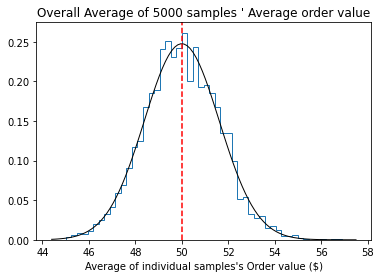

In [53]:
means_1000_samples_5000_exp = exponential_experiment_clt(5000,1000,50,False)
fig_exp_1000 = clt_normal_approximation(means_1000_samples_5000_exp,5000)

From the above plot we can interpret, As we input larger sample it approximates to "Bell Shape"

Documentation:<br>
<a href="https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.html" title="matplotlib.pyplot">plt()</a><br>
<a href="https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist" title="matplotlib.pyplot.hist">plt.hist()</a><br>
<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html" title="scipy.stats.norm">norm()</a><br>
<a href="https://docs.scipy.org/doc/scipy/reference/special.html" title="scipy.special">sps</a><br>